In [73]:
import pandas as pd
import numpy as np
import scipy as scp
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [64]:
requests_1 = pd.read_csv('./3/requests_1.csv')
requests_2 = pd.read_csv('./3/requests_2.csv')
requests_3 = pd.read_csv('./3/requests_3.csv')

In [11]:
requests_1.drop(columns=['Unnamed: 0'], inplace=True)
requests_2.drop(columns=['Unnamed: 0'], inplace=True)
requests_3.drop(columns=['Unnamed: 0'], inplace=True)

In [16]:
requests_1

,time
0,1.071139
1,1.108988
2,1.158742
3,1.322638
4,1.341548
...,...
2461,199.698901
2462,199.793415
2463,199.857754
2464,199.949665


<Axes: xlabel='time', ylabel='Count'>

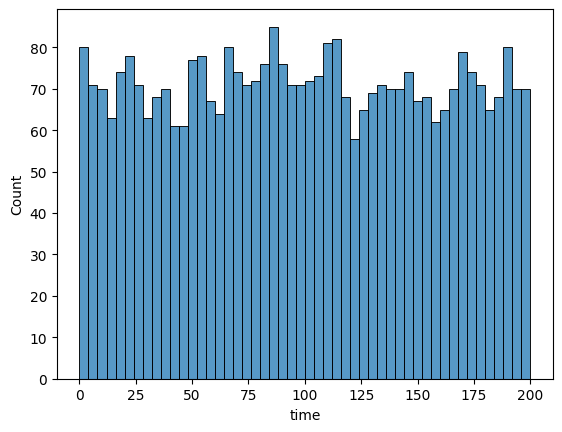

In [186]:
sns.histplot(x=requests_3.time, bins=50)


d:\hackaton24\Lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
d:\hackaton24\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\123\AppData\Local\Temp\ipykernel_11804\3917761982.py:1: RankWarning: Polyfit may be poorly conditioned
  z = np.polyfit(requests_3.index, requests_3.time, 50)


<Axes: >

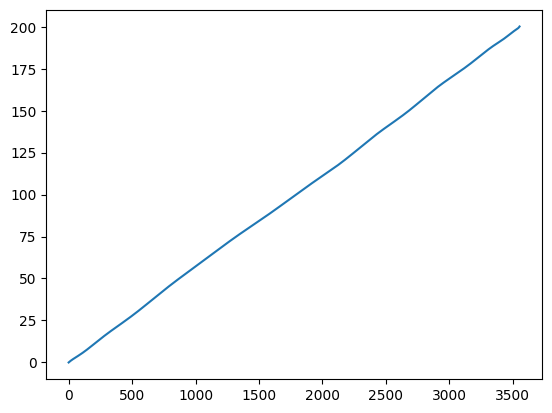

In [192]:
z = np.polyfit(requests_3.index, requests_3.time, 50)
p = np.poly1d(z)
sns.lineplot(p(requests_3.index))

In [ ]:
bins, edges = np.histogram(requests_1.time)

In [137]:
bins

array([148, 212, 155, 155, 137, 278, 334, 341, 354, 352], dtype=int64)

In [138]:
edges

array([  1.07113864,  20.95995201,  40.84876538,  60.73757874,
        80.62639211, 100.51520548, 120.40401884, 140.29283221,
       160.18164558, 180.07045894, 199.95927231])

<Axes: >

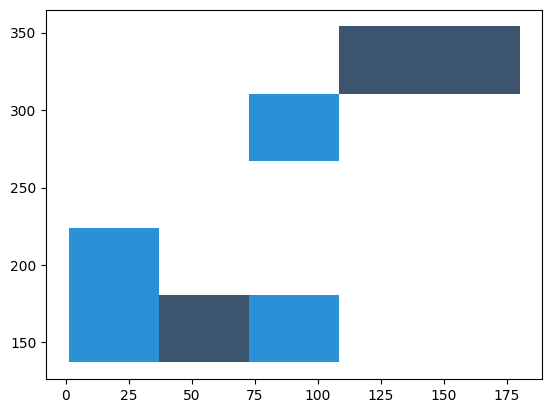

In [139]:
sns.histplot(x=edges[:-1], y=bins)

In [130]:
edges

array([  1.07113864,  20.95995201,  40.84876538,  60.73757874,
        80.62639211, 100.51520548, 120.40401884, 140.29283221,
       160.18164558, 180.07045894, 199.95927231])

In [68]:
def get_iot(req):
    time = req.time.to_list()
    iot = [0]
    for i in range(1, len(time)):
        iot.append(time[i] - time[i-1])
    req['iot']=iot

In [69]:
get_iot(requests_1)
requests_1

,Unnamed: 0,time,iot
0,0,1.071139,0.000000
1,1,1.108988,0.037849
2,2,1.158742,0.049754
3,3,1.322638,0.163896
4,4,1.341548,0.018910
...,...,...,...
2461,2461,199.698901,0.043140
2462,2462,199.793415,0.094513
2463,2463,199.857754,0.064339
2464,2464,199.949665,0.091912


In [113]:
get_iot(requests_3)

In [114]:
mean = requests_3.iot.median()
mean

0.050785202499998405

In [115]:
std = requests_3.iot.std()
std

0.049806993748558986

In [116]:
requests_3[abs(requests_3.iot-mean) > std]

,Unnamed: 0,time,iot
0,0,0.075171,0.000000
38,38,2.049338,0.405886
52,52,3.079232,0.354278
65,65,3.471745,0.000839
117,117,6.074511,0.146331
...,...,...,...
3431,3431,193.081583,0.135326
3445,3445,194.073191,0.366676
3463,3463,195.087871,0.214894
3503,3503,197.039778,0.113367


<Axes: xlabel='time', ylabel='iot'>

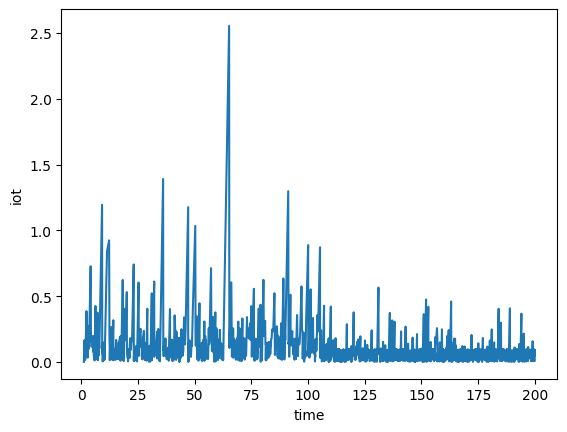

In [120]:

kmean = KMeans(n_clusters=2)
kmean.fit_transform(requests_1)

sns.lineplot(y=requests_1.iot, x=requests_1.time)

<Axes: xlabel='time', ylabel='iot'>

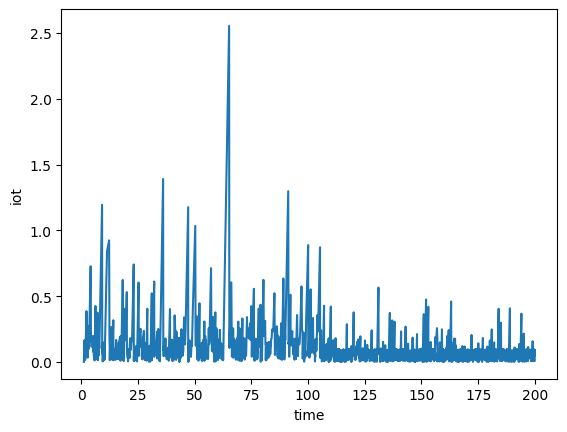

In [52]:
sns.lineplot(x=requests_1.time, y=requests_1.iot)

<Axes: xlabel='time', ylabel='iot'>

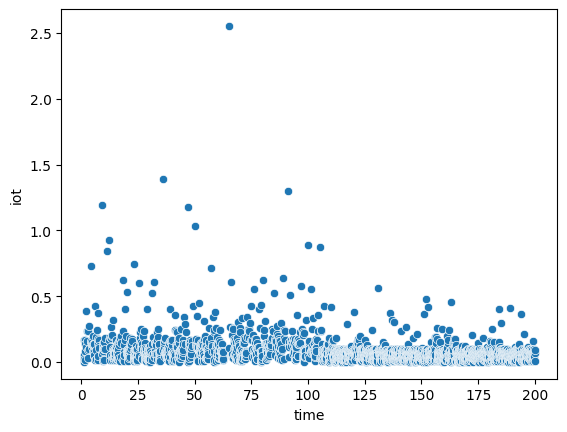

In [56]:
mean = req
for i in requests_1.index:
    requests_1[i]

In [58]:
pca = PCA(n_components = 1)

<Axes: >

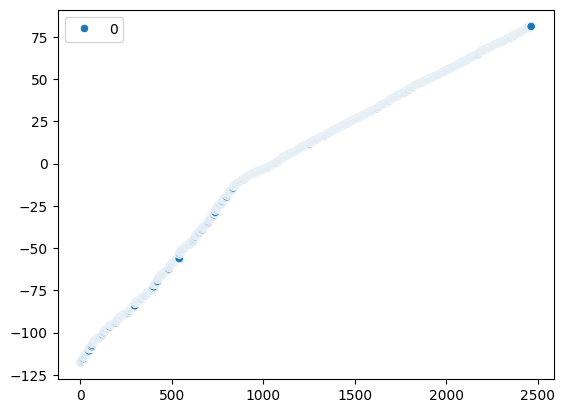

In [59]:
sns.scatterplot(pca.fit_transform(requests_1))

requests_1: 113 сек
requests_2: 105 сек
requests_3: 0 сек

In [194]:
pd.Series([113,105,0]).to_csv('Task3.csv', header=False, index=False)